# Investigating the Impacts of Ocean Acidification on Biological Export of Silica

### Importing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy import stats, interpolate
import matplotlib.dates as mdates

filepath = 'HOT_Bottle_ALOHA.csv'

# Read in data using only desired columns and time as datetime object
    # Datetimes were importing as confusing strings until I found:  
    # https://www.reddit.com/r/learnpython/comments/743l4g/loading_a_csv_into_a_dataframe_with_a_datetime_as/?rdt=36291
aloha = pd.read_csv(filepath, usecols=['time','depth','ph_bottle_hot','SiO4_bottle_hot','psi_bottle_hot'], parse_dates=['time'])

### Smoothing the data

In [2]:
# Set datetime column as index so I can organize data by time
    # Struggled to organize daily values so they could be grouped until I parsed dates (above) and found this:
    # https://www.includehelp.com/python/how-to-set-column-as-date-index.aspx
aloha.set_index('time', inplace=True)
#display(aloha)

# Subset data for surface ocean only 
aloha_100 = aloha[(aloha.depth <100)]

# Average data by day
aloha_avg_100 = aloha_100.groupby('time').mean(numeric_only=True)

# Find rolling 3 monthly mean
season_ph = aloha_avg_100['ph_bottle_hot'].rolling(window=90, min_periods=9, center=True).mean()
season_sio4 = aloha_avg_100['SiO4_bottle_hot'].rolling(window=90, min_periods=9, center=True).mean()
season_psi = aloha_avg_100['psi_bottle_hot'].rolling(window=90, min_periods=9, center=True).mean()

# Preliminary Visualization

### Plot Rolling Seasonal Averages

Text(0.5, 0, 'Year')

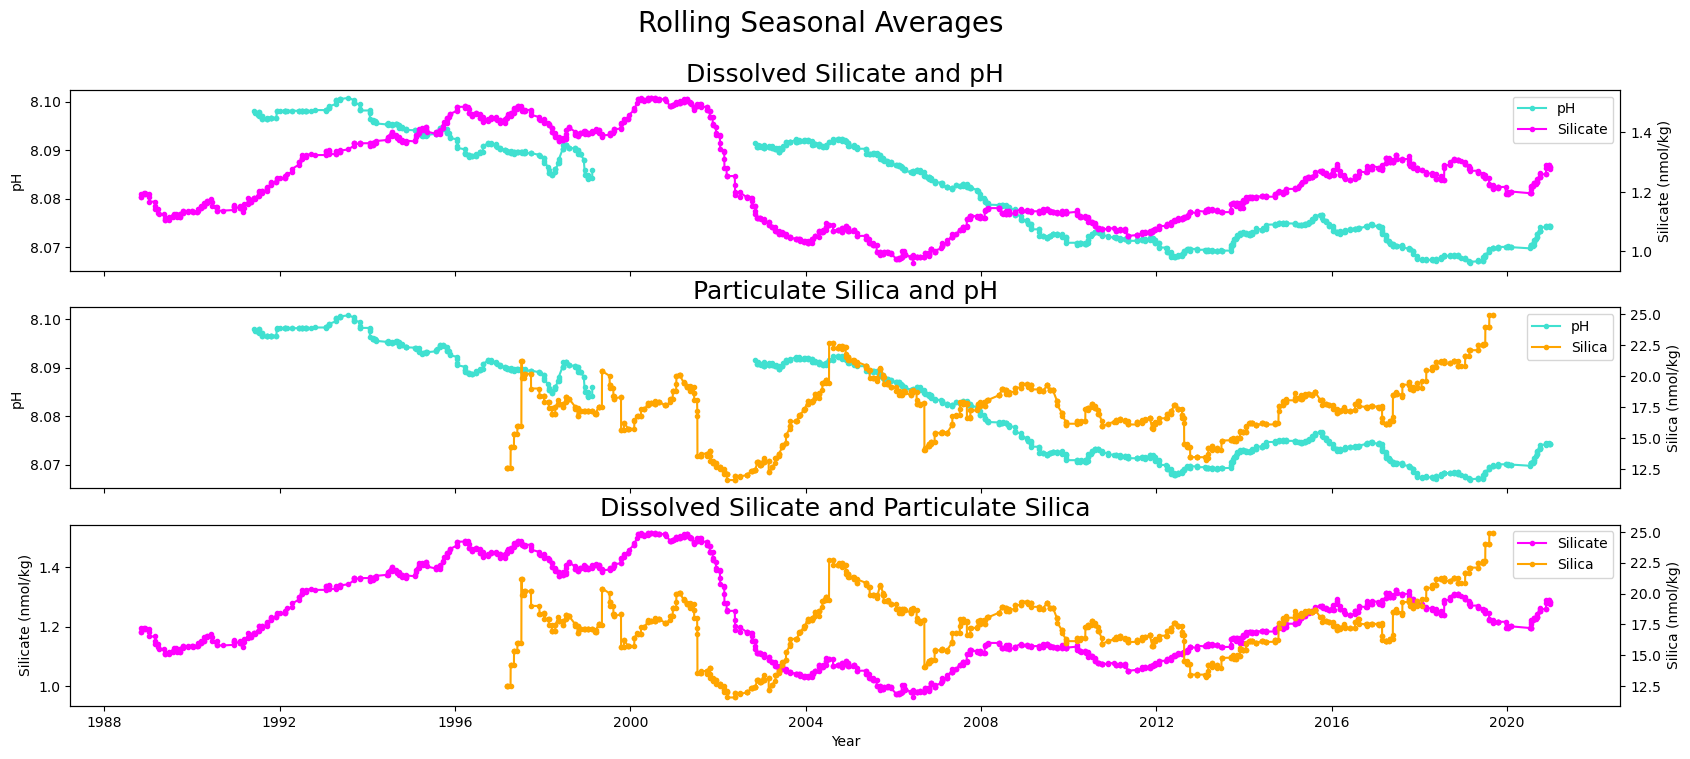

In [3]:
fig, axs = plt.subplots(figsize=(20,8), nrows=3, sharex=True)
plt.suptitle("Rolling Seasonal Averages", fontsize=20)


# pH and Silicate
# Plot pH
ph_0 = axs[0].plot(season_ph.index, season_ph.values, marker='.', c='turquoise', label='pH')
# Plot Silicate
twinx0 = axs[0].twinx()
sio4_0 = twinx0.plot(season_sio4.index, season_sio4.values, marker='.', c='magenta', label='Silicate')
axs[0].legend()
# Share legend
    #https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines = ph_0 + sio4_0
labels = [l.get_label() for l in lines]
axs[0].legend(lines, labels, loc=0)
# Set labels
axs[0].set_title('Dissolved Silicate and pH', fontsize=18)
axs[0].set_ylabel('pH')
twinx0.set_ylabel('Silicate (nmol/kg)')


# pH and Silica
# Plot pH
ph_1 = axs[1].plot(season_ph.index, season_ph.values, marker='.', c='turquoise', label='pH')
# Plot Silica
twinx1 = axs[1].twinx()
psi_1 = twinx1.plot(season_psi.index, season_psi.values, marker='.', c='orange', label='Silica')
axs[1].legend()
# Share legend
lines = ph_1 + psi_1
labels = [l.get_label() for l in lines]
axs[1].legend(lines, labels, loc=0)
# Set labels
axs[1].set_title('Particulate Silica and pH', fontsize=18)
axs[1].set_ylabel('pH')
twinx1.set_ylabel('Silica (nmol/kg)')


# Silicate and Silica
# Plot silicate
sio4_2 = axs[2].plot(season_sio4.index, season_sio4.values, marker='.', c='magenta', label='Silicate')
# Plot Silica
twinx2 = axs[2].twinx()
psi_2 = twinx2.plot(season_psi.index, season_psi.values, marker='.', c='orange', label='Silica')
axs[2].legend()
# Share legend
lines = sio4_2 + psi_2
labels = [l.get_label() for l in lines]
axs[2].legend(lines, labels, loc=0)
# Set labels
axs[2].set_title('Dissolved Silicate and Particulate Silica', fontsize=18)
axs[2].set_ylabel('Silicate (nmol/kg)')
twinx2.set_ylabel('Silica (nmol/kg)')
axs[2].set_xlabel('Year')

# Final Visualization
##### Due to gaps in the data, I want to select the time span with the longest continous data for all three variables.

### Locate values after large pH gap

In [4]:
# Select values after year 2000
    # https://chat.openai.com/c/7d9590c1-bd32-4594-8377-a4ad7246f2bf
ph_2000 = season_ph[season_ph.index.year > 2000]
sio4_2000 = season_sio4[season_sio4.index.year > 2000]
psi_2000 = season_psi[season_psi.index.year > 2000]

# Find indices where pH is not null
ph_inds = np.where(ph_2000.notnull())
# ph_inds is returning a tuple, selecting just the first array
ph_inds = ph_inds[0]

### Plot Rolling Seasonal Averages after 2000

##### Graph data only where pH has value - subset Silicate and Silica with pH non-NaN indices

Text(0.5, 131.7222222222222, 'Year')

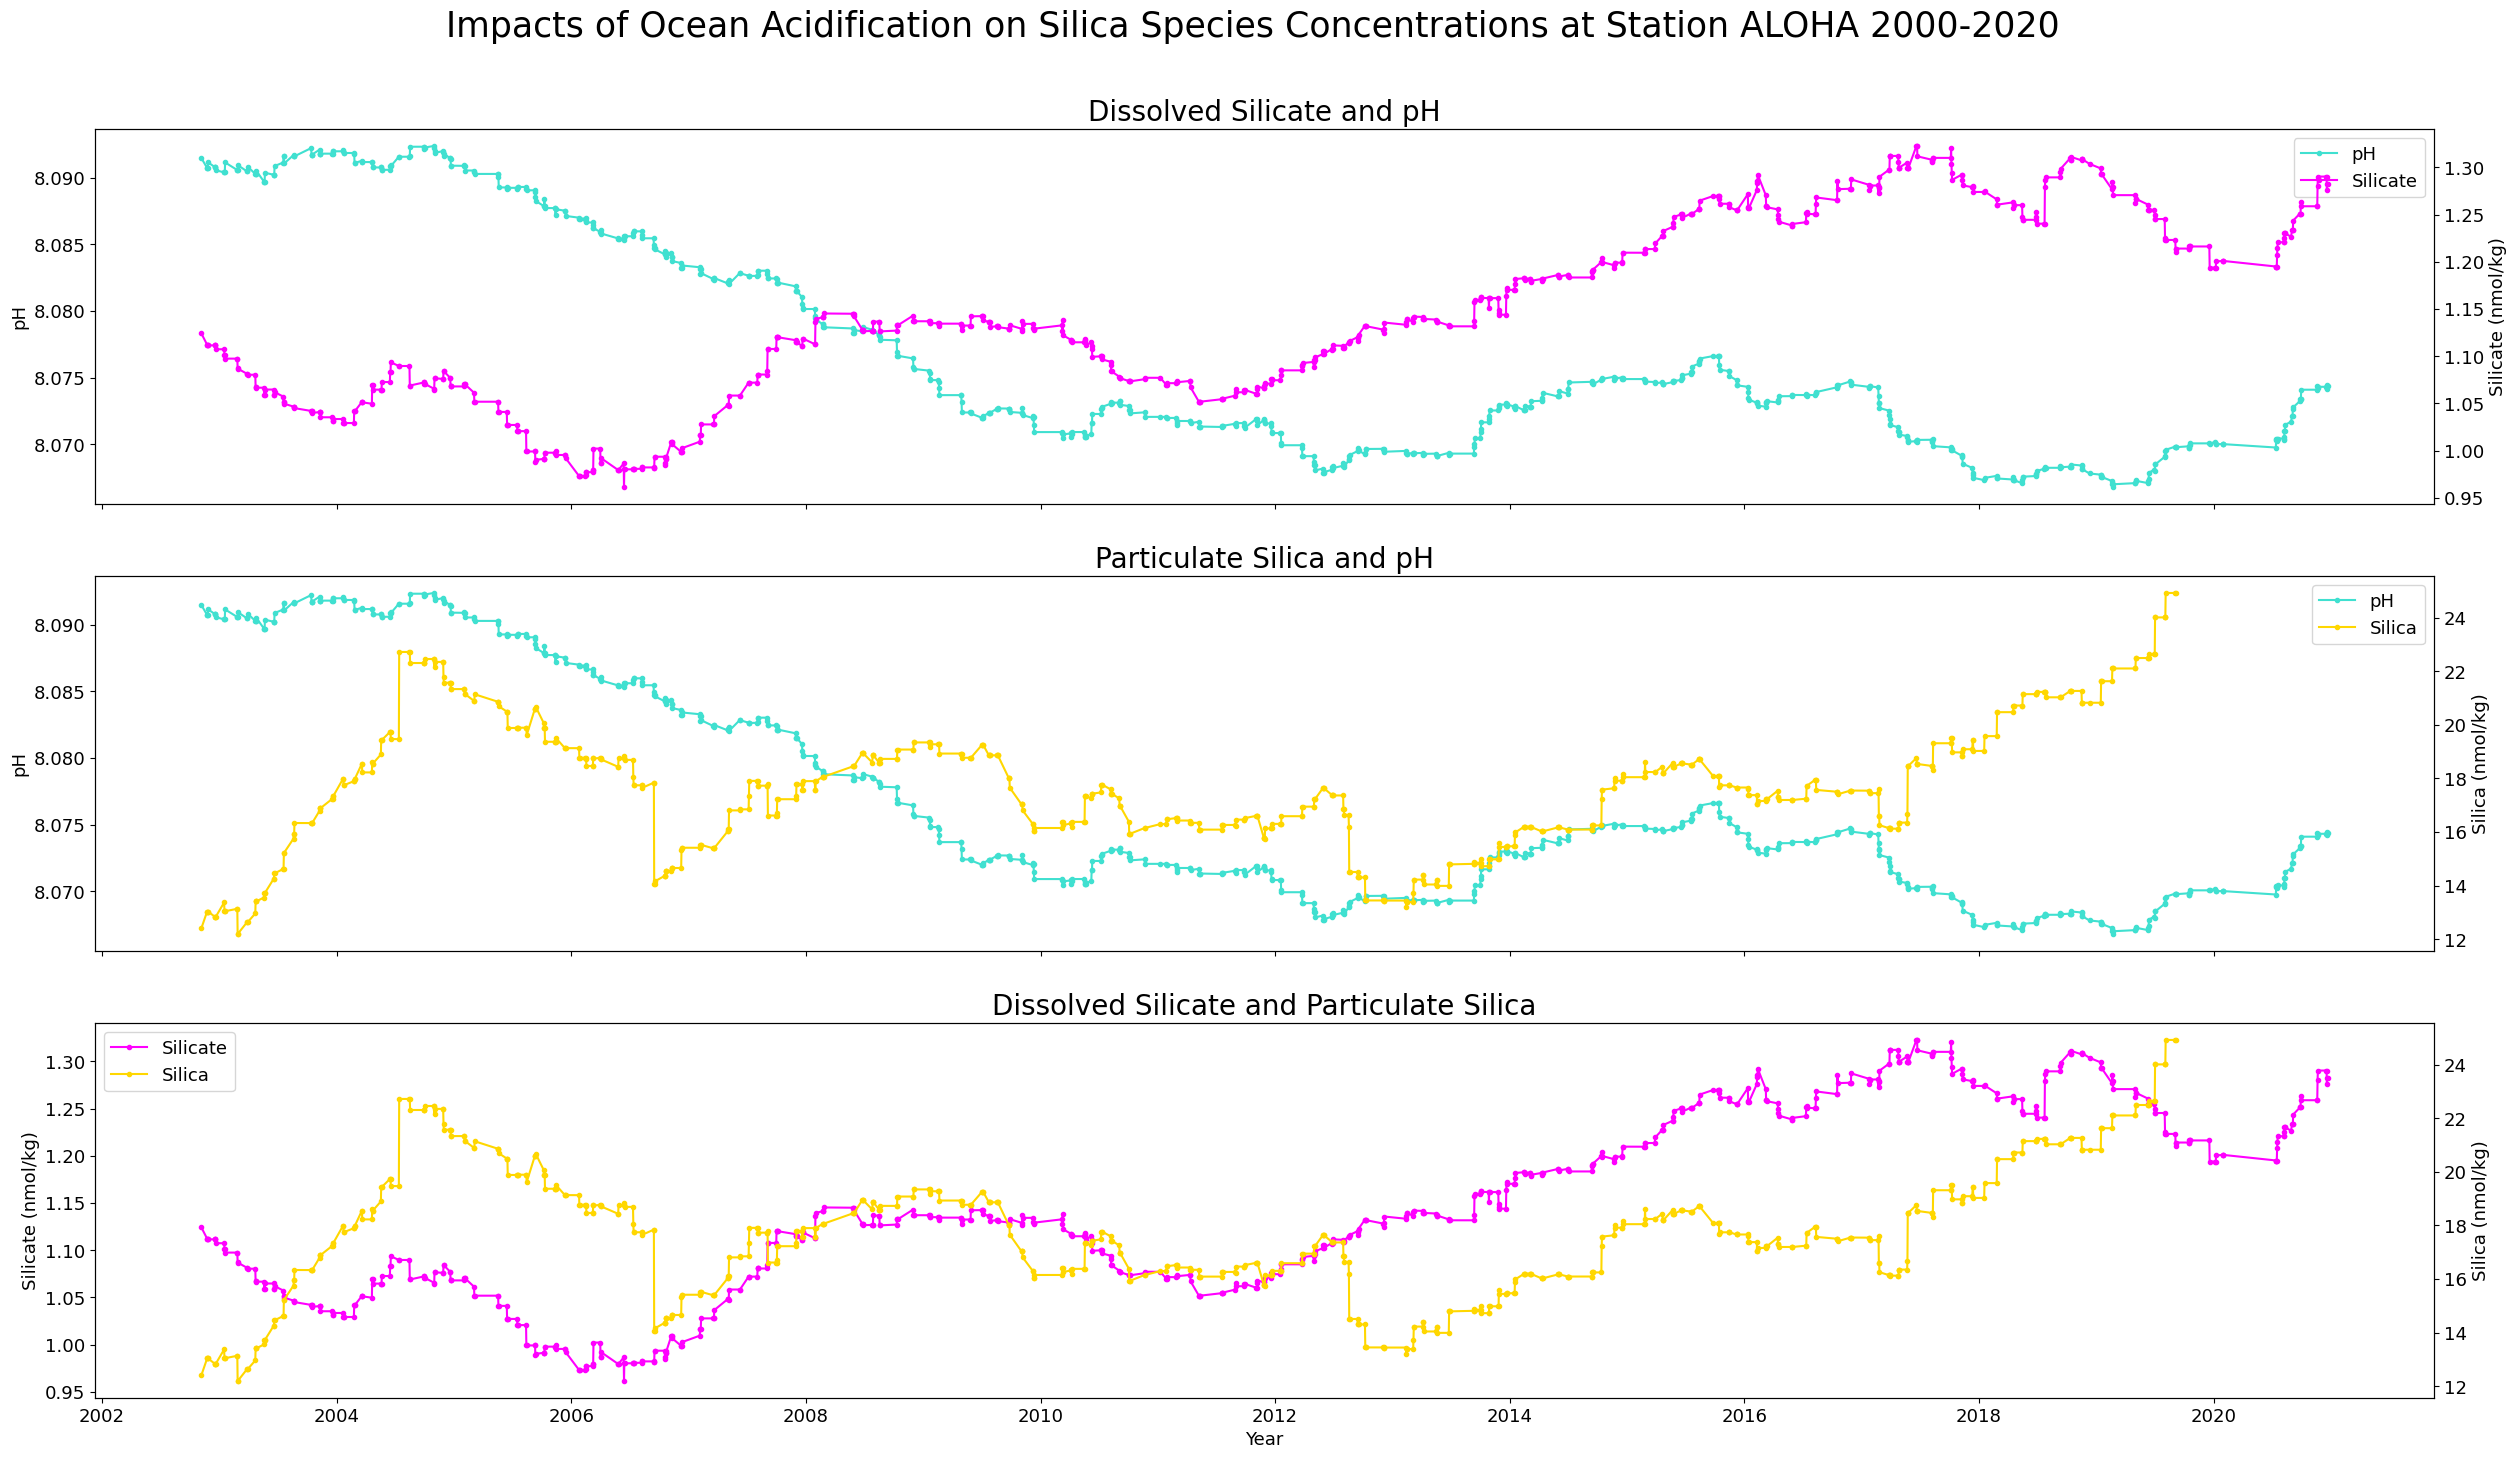

In [11]:
fig, axs = plt.subplots(figsize=(25,15), nrows=3, sharex=True)
plt.suptitle("Impacts of Ocean Acidification on Silica Species Concentrations at Station ALOHA 2000-2020", fontsize=25)
fig.tight_layout(pad=3.0)
plt.rcParams.update({'font.size':13})

# pH and Silicate
# Plot pH
ph_0 = axs[0].plot(ph_2000[ph_inds].index, ph_2000[ph_inds].values, marker='.', c='turquoise', label='pH')
# Plot Silicate
twinx0 = axs[0].twinx()
sio4_0 = twinx0.plot(sio4_2000[ph_inds].index, sio4_2000[ph_inds].values, marker='.', c='magenta', label='Silicate')
# Share legend
    #https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines = ph_0 + sio4_0
labels = [l.get_label() for l in lines]
axs[0].legend(lines, labels, loc=0)
# Set labels
axs[0].set_title('Dissolved Silicate and pH', fontsize=20)
axs[0].set_ylabel('pH')
twinx0.set_ylabel('Silicate (nmol/kg)')

# pH and Silica
# Plot pH
ph_1 = axs[1].plot(ph_2000[ph_inds].index, ph_2000[ph_inds].values, marker='.', c='turquoise', label='pH')
# Plot Silica
twinx1 = axs[1].twinx()
psi_1 = twinx1.plot(psi_2000[ph_inds].index, psi_2000[ph_inds].values, marker='.', c='gold', label='Silica')
# Share legend
lines = ph_1 + psi_1
labels = [l.get_label() for l in lines]
axs[1].legend(lines, labels, loc=0)
# Set labels
axs[1].set_title('Particulate Silica and pH', fontsize=20)
axs[1].set_ylabel('pH')
twinx1.set_ylabel('Silica (nmol/kg)')

# Silicate and Silica
# Plot silicate
sio4_2 = axs[2].plot(sio4_2000[ph_inds].index, sio4_2000[ph_inds].values, marker='.', c='magenta', label='Silicate')
# Plot Silica
twinx2 = axs[2].twinx()
psi_2 = twinx2.plot(psi_2000[ph_inds].index, psi_2000[ph_inds].values, marker='.', c='gold', label='Silica')
# Share legend
lines = sio4_2 + psi_2
labels = [l.get_label() for l in lines]
axs[2].legend(lines, labels, loc=0)
# Set labels
axs[2].set_title('Dissolved Silicate and Particulate Silica', fontsize=20)
axs[2].set_ylabel('Silicate (nmol/kg)')
twinx2.set_ylabel('Silica (nmol/kg)')
axs[2].set_xlabel('Year')

# Statistical Analysis

##### Generally, I would use unsmoothed data to run linear regressions, however, there were no exact dates with both particulate silica and pH data. 
##### Instead, I used daily mean data because it was the least manipulated dataframe.


### Find indices where: 
### 1) both pH and Silicate have values
### 2) both pH and Silica have values

In [6]:
# Subset surface ocean daily mean dataset to year after 2000
aloha_2000 = aloha_avg_100[aloha_avg_100.index.year > 2000]
# Reset index so I can select by row number 
aloha_2000 = aloha_2000.reset_index()
# display(aloha_2000)

# Find indices where ph and sio4 are not nan
sio4_inds = np.where(~np.isnan(aloha_2000['ph_bottle_hot']) & ~np.isnan(aloha_2000['SiO4_bottle_hot']))
# Make weird tuple a one dimensional array
sio4_inds = sio4_inds[0]
# Create new dataframe with ph and sio4 non nans
aloha_sio4 = aloha_2000.loc[sio4_inds, ['ph_bottle_hot','SiO4_bottle_hot']]
# display(aloha_sio4)

# Find indices where ph and sio4 are not nan
psi_inds = np.where(~np.isnan(aloha_2000['ph_bottle_hot']) & ~np.isnan(aloha_2000['psi_bottle_hot']))
# Make weird tuple a one dimensional array
psi_inds = psi_inds[0]
# Create new dataframe with ph and sio4 non nans
aloha_psi = aloha_2000.loc[psi_inds, ['ph_bottle_hot','psi_bottle_hot']]
# display(aloha_psi)

### Linear Regression 

In [16]:
# sio4 linear regression
slope_sio4, intercept_sio4, rvalue_sio4, pvalue_sio4, stderr_sio4 = stats.linregress(aloha_sio4['ph_bottle_hot'], aloha_sio4['SiO4_bottle_hot'])
y_sio4 = (slope_sio4*aloha_sio4['ph_bottle_hot']) + intercept_sio4
print('Dissolved Silicate:')
print('slope:', slope_sio4)
print('y-intercept:', intercept_sio4)
print('r^2-value:', rvalue_sio4**2)

# psi linear regression
slope_psi, intercept_psi, rvalue_psi, pvalue_psi, stderr_psi = stats.linregress(aloha_psi['ph_bottle_hot'], aloha_psi['psi_bottle_hot'])
y_psi = (slope_psi*aloha_psi['ph_bottle_hot']) + intercept_psi
print('Particulate Silica:')
print('slope:', slope_psi)
print('y-intercept:', intercept_psi)
print('r^2-value:', rvalue_psi**2)

Dissolved Silicate:
slope: -3.2686349755164614
y-intercept: 27.549639624322744
r^2-value: 0.03977792042864072
Particulate Silica:
slope: 43.00779153191432
y-intercept: -329.04770728067575
r^2-value: 0.002605022993187803


### Linear Regression Visualization

Text(0.5, 0, 'pH')

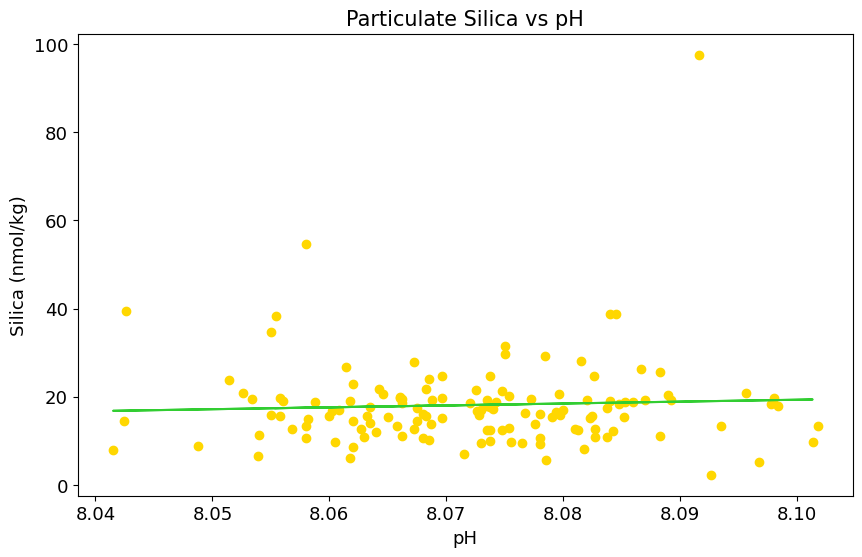

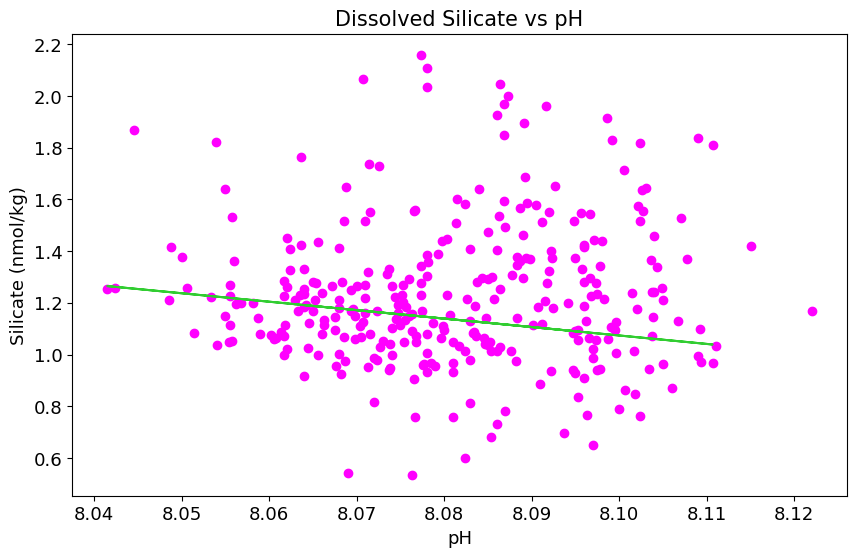

In [8]:
# Plot daily mean: ph vs psi
fig, axs = plt.subplots(figsize=(10,6))
plt.scatter(aloha_avg_100['ph_bottle_hot'].values, aloha_avg_100['psi_bottle_hot'].values, color='gold') 
plt.plot(aloha_psi['ph_bottle_hot'], y_psi, label='Linear Regression', color='limegreen')
# Set labels
axs.set_title('Particulate Silica vs pH', fontsize=15)
axs.set_ylabel('Silica (nmol/kg)')
axs.set_xlabel('pH')
ax

# Plot daily mean: ph vs sio4
fig, axs = plt.subplots(figsize=(10,6))
plt.scatter(aloha_avg_100['ph_bottle_hot'].values, aloha_avg_100['SiO4_bottle_hot'].values, color='magenta')
plt.plot(aloha_sio4['ph_bottle_hot'], y_sio4, label='Linear Regression', color='limegreen')
# Set labels
axs.set_title('Dissolved Silicate vs pH', fontsize=15)
axs.set_ylabel('Silicate (nmol/kg)')
axs.set_xlabel('pH')
